In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

imputer = SimpleImputer(strategy='most_frequent')
df[['Age', 'Embarked']] = imputer.fit_transform(df[['Age', 'Embarked']])
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [2]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

AUC: 0.8831402831402833

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

AUC: 0.8949163449163449

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    acc

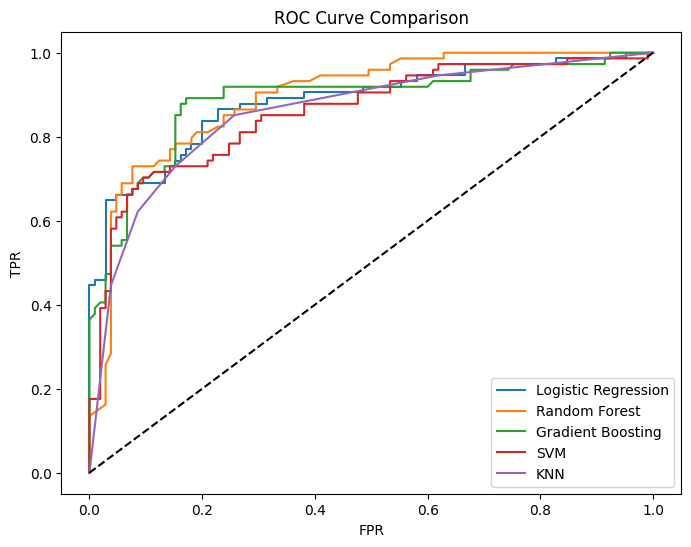

In [3]:

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=label)

plt.figure(figsize=(8,6))
for name, model in models.items():
    plot_roc_curve(model, X_test_scaled, y_test, name)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [4]:

import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6130 - loss: 0.6613 - val_accuracy: 0.7374 - val_loss: 0.5870
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7494 - loss: 0.5594 - val_accuracy: 0.7933 - val_loss: 0.5075
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7710 - loss: 0.5103 - val_accuracy: 0.7709 - val_loss: 0.4670
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7840 - loss: 0.4797 - val_accuracy: 0.7765 - val_loss: 0.4473
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7940 - loss: 0.4621 - val_accuracy: 0.7877 - val_loss: 0.4380
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7916 - loss: 0.4505 - val_accuracy: 0.7877 - val_loss: 0.4331
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8053 - loss: 0.4476 - val_accuracy: 0.7821 - val_loss: 0.4293
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8007 - loss: 0.4639 - val_accuracy: 0.7877 - val_loss: 0.4297
Ep

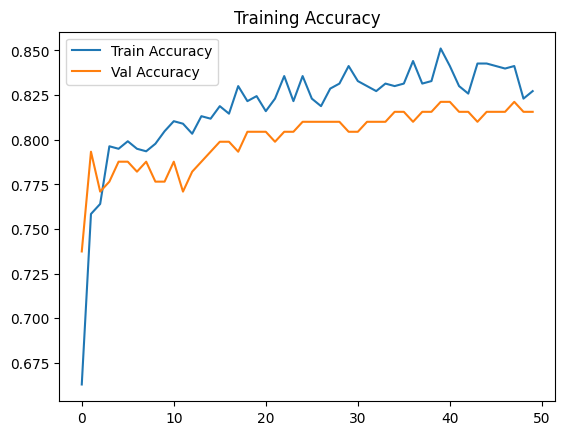

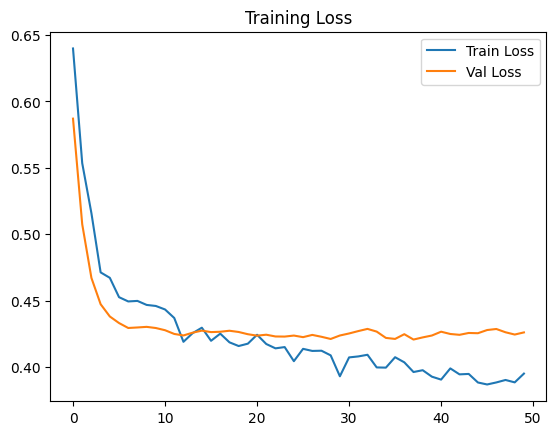

In [5]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training Loss")
plt.show()


--- Training Traditional ML Models (within comparison cell) ---

--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

AUC: 0.8831402831402833

--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

AUC: 0.8909266409266409

--- Gradient Boosting ---
Classification Report:
               precision    recall  f1-score   support

           0       0.81     

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


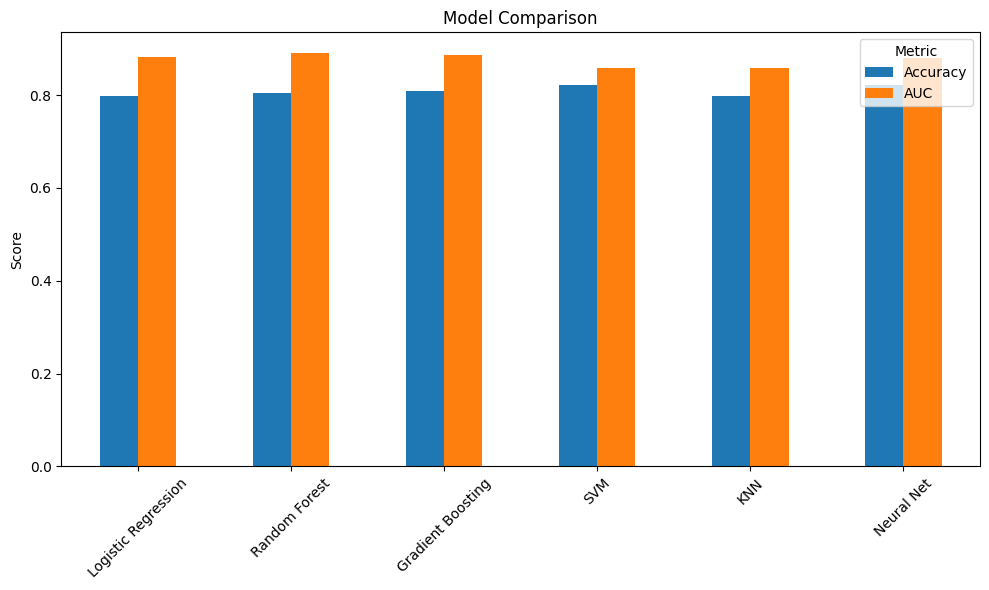

In [11]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models as tf_models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assuming X_train_scaled, y_train, X_test_scaled, y_test are already defined

# Re-initialize and train the scikit-learn models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier()
}

print("--- Training Traditional ML Models (within comparison cell) ---")
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

# Build and train the Neural Network
print("\n--- Building and Training Neural Network (within comparison cell) ---")
tf_model = tf_models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
tf_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = tf_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=0)

# Evaluate all models
results = {}
classic_models_dict = models

classic_models = list(classic_models_dict.keys())
for model_name in classic_models:
    model = classic_models_dict[model_name]
    acc = model.score(X_test_scaled, y_test)
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    results[model_name] = [acc, auc]

results['Neural Net'] = [
    tf_model.evaluate(X_test_scaled, y_test, verbose=0)[1],
    roc_auc_score(y_test, tf_model.predict(X_test_scaled).flatten())
]

results_df = pd.DataFrame(results, index=["Accuracy", "AUC"]).T
results_df.plot(kind='bar', figsize=(10,6), title="Model Comparison")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()